# Links
#### [3Blue1Brown Linear Algebra Video Playlist](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
#### [Setosa EigenVectors and EigenValues](http://setosa.io/ev/eigenvectors-and-eigenvalues/)
#### [Setosa PCA](http://setosa.io/ev/principal-component-analysis/)
#### [PCA Overview](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)
#### [PCA -- Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
#### [PCA -- Quora-Explaination](https://www.quora.com/How-can-principal-component-analysis-be-explained-in-simple-words)

In [1]:
import numpy as np
import matplo`tlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('../Datasets/mnist/train.csv')

In [3]:
X = ds.values[:, 1:]
labels = ds.values[:, 0]
print(X.shape)
print(labels.shape)

(42000, 784)
(42000,)


In [4]:
X_std = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-03) # Standardizing the data
print(X_std.shape)

mean = np.mean(X_std, axis=0)
print(mean)
print(mean.shape)

(42000, 784)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.30472630e-19 -1.26882631e-18 -2.62224105e-18  5.49824736e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.76707367e-19 -2.03012210e-18 -2.45306421e-18  5.92118946e-18
 -8.45884209e-18 -1.69176842e-18 -8.54343051e-18  7.44378104e-18
 -4.56777473e-18 -1.38725010e-17  9.98143367e-18  2.06818689e-17
 -2.42768768e-17 -3.55271368e-18  1.18423789e-17  3.38353684e-19
 -1.35341473e-18 -1.52259158e-18  2.07241631e-18  2.96059473e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.20538500e-18  6.06921920e-18
 -2.03012210

In [5]:
cov = np.cov(X_std, rowvar=False)
print(cov.shape)

(784, 784)


In [6]:
cov[100:105,100:105]

array([[0.99998378, 0.76790152, 0.40754608, 0.1598037 , 0.04140466],
       [0.76790152, 0.99998142, 0.76059196, 0.40503524, 0.15213517],
       [0.40754608, 0.76059196, 0.99997677, 0.76374764, 0.39246381],
       [0.1598037 , 0.40503524, 0.76374764, 0.99996864, 0.74421785],
       [0.04140466, 0.15213517, 0.39246381, 0.74421785, 0.99995292]])

In [7]:
print(mean[400:410])
print(cov[510:515, 510:515])

[ 5.33329994e-17 -6.09036631e-18 -3.11708331e-17  5.33752936e-17
  6.55560262e-18 -1.08696121e-17  4.77924578e-17  6.63173220e-17
 -1.52259158e-17  1.87786294e-17]
[[0.99999858 0.76557687 0.40881585 0.14582154 0.02857417]
 [0.76557687 1.00000165 0.76155178 0.39940025 0.15539897]
 [0.40881585 0.76155178 1.00000308 0.75886348 0.41042703]
 [0.14582154 0.39940025 0.75886348 1.00000383 0.76714196]
 [0.02857417 0.15539897 0.41042703 0.76714196 1.00000435]]


In [8]:
eigen = np.linalg.eig(cov)
eigen_values, eigen_vectors = eigen
# print(eigen[0])
print(eigen_values.shape, eigen_vectors.shape)
print(eigen_values[:10], eigen_vectors[:10])

(784,) (784, 784)
[40.69537351 29.11041321 26.7824754  20.81403518 18.09952427 15.78714241
 13.82359513 12.54272145 11.0633458  10.08842803] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


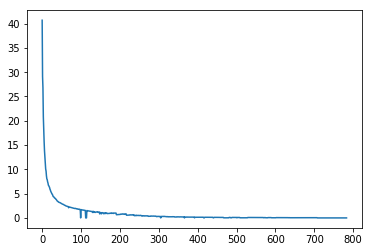

In [9]:
plt.figure()
plt.plot(eigen_values)
plt.show()

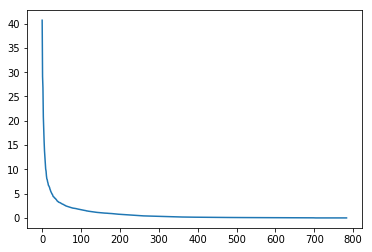

In [10]:
plt.figure()
plt.plot(sorted(eigen_values, reverse=True))
plt.show()

In [11]:
sorted(eigen_values[:20], reverse=True)

[40.695373510677385,
 29.110413209940468,
 26.782475402618083,
 20.814035180517937,
 18.09952426900915,
 15.787142408885563,
 13.823595131453402,
 12.54272144959712,
 11.06334579911422,
 10.088428029637354,
 9.635671525398541,
 8.655033421420455,
 8.040638133373722,
 7.880458529941779,
 7.435782842205359,
 7.166919444903976,
 6.734663462044198,
 6.6160179641663,
 6.422852968540054,
 6.267534335694226]

In [12]:
eigen_vectors[:, 337]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.19820373e-03,  7.59456251e-04, -4.21440354e-03, -4.12448246e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.29995989e-03,  5.80402579e-03, -1.22796005e-02, -1.79019696e-02,
        4.81009055e-02, -2.00339670e-02, -4.09705084e-02,  4.82954172e-02,
       -1.88352018e-02, -2.54906496e-02,  3.69798506e-02, -3.08081842e-02,
       -1.09513773e-02,  3.61685450e-02, -3.57900544e-02,  1.09056942e-02,
       -2.04300741e-03, -7.22598753e-03,  5.30395782e-03, -5.99050451e-04,
        0.00000000e+00,  

In [13]:
eigen_zipped = zip(eigen_values,eigen_vectors)
eigen_zipped = list(eigen_zipped)
print(len(eigen_zipped))
print(eigen_zipped[100][0])

784
1.7076314529083394


In [14]:
eigen_sorted = sorted(eigen_zipped, key=lambda x: x[0], reverse=True)
print(eigen_sorted[100])

print(eigen_sorted[500])

(1.6811848524258877, array([ 1.38519829e-02, -3.43187646e-02,  2.46262618e-02,  7.44064166e-02,
        5.48419391e-02,  1.66377417e-02, -3.43900435e-02, -3.40923237e-02,
       -2.80687099e-04, -5.24930443e-02,  2.94645388e-02,  3.06485882e-02,
       -1.25153533e-02, -5.19124237e-02,  2.53671843e-02,  1.39001546e-02,
        1.24297611e-02, -2.19832453e-02, -5.59556488e-03,  1.63533864e-02,
        4.18891193e-02, -5.96600849e-02,  9.20606277e-02, -3.82515090e-02,
        1.17855292e-02, -4.98109601e-02,  7.96797018e-02, -1.88878756e-02,
        2.73931807e-02, -3.66477955e-02,  4.97751863e-02,  2.04636184e-02,
        1.19593248e-02,  9.05566329e-03, -7.55157729e-02, -6.36314385e-02,
       -6.44590048e-03,  1.44129161e-02, -4.23304129e-02, -9.23196824e-04,
       -4.81736769e-02, -4.92710557e-02,  1.68201023e-02, -8.42881937e-02,
       -4.65615707e-02, -1.00421428e-01,  3.23097947e-02,  5.33271902e-02,
        1.92951034e-02, -1.55121603e-02,  1.62656325e-02,  3.15305049e-03,
    

In [15]:
eigen_values, eigen_vectors = list(), list()
for lam, vec in eigen_sorted:
    eigen_values.append(lam)
    eigen_vectors.append(vec)
eigen_values = np.array(eigen_values)
eigen_vectors = np.array(eigen_vectors)

print(eigen_values.shape, eigen_vectors.shape)
print(eigen_values[100])
print(eigen_vectors[100])

(784,) (784, 784)
1.6811848524258877
[ 1.38519829e-02 -3.43187646e-02  2.46262618e-02  7.44064166e-02
  5.48419391e-02  1.66377417e-02 -3.43900435e-02 -3.40923237e-02
 -2.80687099e-04 -5.24930443e-02  2.94645388e-02  3.06485882e-02
 -1.25153533e-02 -5.19124237e-02  2.53671843e-02  1.39001546e-02
  1.24297611e-02 -2.19832453e-02 -5.59556488e-03  1.63533864e-02
  4.18891193e-02 -5.96600849e-02  9.20606277e-02 -3.82515090e-02
  1.17855292e-02 -4.98109601e-02  7.96797018e-02 -1.88878756e-02
  2.73931807e-02 -3.66477955e-02  4.97751863e-02  2.04636184e-02
  1.19593248e-02  9.05566329e-03 -7.55157729e-02 -6.36314385e-02
 -6.44590048e-03  1.44129161e-02 -4.23304129e-02 -9.23196824e-04
 -4.81736769e-02 -4.92710557e-02  1.68201023e-02 -8.42881937e-02
 -4.65615707e-02 -1.00421428e-01  3.23097947e-02  5.33271902e-02
  1.92951034e-02 -1.55121603e-02  1.62656325e-02  3.15305049e-03
  3.42698836e-02 -2.10958688e-03 -3.03884142e-03 -4.91129013e-02
 -1.22695601e-02 -4.91076186e-02 -3.14496048e-02 -2.8

In [16]:
eigen_values[:10]

array([40.69537351, 29.11041321, 26.7824754 , 20.81403518, 18.09952427,
       15.78714241, 13.82359513, 12.54272145, 11.0633458 , 10.08842803])

In [17]:
eigen_cumulative = np.cumsum(eigen_values) / eigen_values.sum()
print(eigen_cumulative.shape)
print(eigen_cumulative[:10])

(784,)
[0.05752403 0.0986724  0.13653017 0.16595138 0.19153555 0.21385111
 0.23339115 0.25112063 0.26675897 0.28101924]


In [21]:
eigen_cumulative[392]

0.9701925075183415

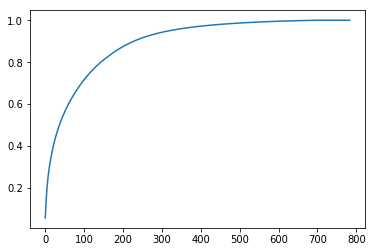

In [22]:
plt.figure()
plt.plot(eigen_cumulative)
plt.show()

In [23]:
def get_k(info=0.95):
    k = 0
    for i in range(eigen_cumulative.shape[0]):
        k = i
        if eigen_cumulative[i] >= info:
            break
    return k

In [24]:
get_k(0.95)

319

In [25]:
def explain_variances(at=None):
    if at is None:
        at = int(eigen_cumulative.shape[0] / 2)
        
    explained = eigen_cumulative[at]
    loss = (1 - explained)
    
    print("--- At {} ---".format(at))
    print("Variances Explained: ", explained * 100, '%')
    print("Loss: ", loss * 100, '%')
    return explained, loss

In [26]:
explain_variances(319)

--- At 319 ---
Variances Explained:  95.00867038583046 %
Loss:  4.991329614169537 %


(0.9500867038583046, 0.049913296141695374)

--- At 0 ---
Variances Explained:  5.752403049730619 %
Loss:  94.24759695026938 %
--- At 1 ---
Variances Explained:  9.867240076201067 %
Loss:  90.13275992379893 %
--- At 2 ---
Variances Explained:  13.653016686530822 %
Loss:  86.34698331346917 %
--- At 3 ---
Variances Explained:  16.59513784480444 %
Loss:  83.40486215519556 %
--- At 4 ---
Variances Explained:  19.15355541471332 %
Loss:  80.84644458528668 %
--- At 5 ---
Variances Explained:  21.385111444431974 %
Loss:  78.61488855556802 %
--- At 6 ---
Variances Explained:  23.33911466230514 %
Loss:  76.66088533769486 %
--- At 7 ---
Variances Explained:  25.112062859958456 %
Loss:  74.88793714004154 %
--- At 8 ---
Variances Explained:  26.67589723779876 %
Loss:  73.32410276220124 %
--- At 9 ---
Variances Explained:  28.10192430570238 %
Loss:  71.89807569429763 %
--- At 10 ---
Variances Explained:  29.463952995631033 %
Loss:  70.53604700436897 %
--- At 11 ---
Variances Explained:  30.687365790597433 %
Loss:  69.31263420940257 %
--- At 12

Variances Explained:  91.76965875575922 %
Loss:  8.23034124424078 %
--- At 253 ---
Variances Explained:  91.83252100862268 %
Loss:  8.167478991377319 %
--- At 254 ---
Variances Explained:  91.89505710812752 %
Loss:  8.10494289187248 %
--- At 255 ---
Variances Explained:  91.95712524556828 %
Loss:  8.042874754431717 %
--- At 256 ---
Variances Explained:  92.01846568067674 %
Loss:  7.9815343193232575 %
--- At 257 ---
Variances Explained:  92.07915814385463 %
Loss:  7.920841856145378 %
--- At 258 ---
Variances Explained:  92.1396814756618 %
Loss:  7.860318524338195 %
--- At 259 ---
Variances Explained:  92.19983245422438 %
Loss:  7.800167545775616 %
--- At 260 ---
Variances Explained:  92.2593841199518 %
Loss:  7.740615880048196 %
--- At 261 ---
Variances Explained:  92.31826083365624 %
Loss:  7.6817391663437595 %
--- At 262 ---
Variances Explained:  92.37677583425821 %
Loss:  7.623224165741782 %
--- At 263 ---
Variances Explained:  92.43512303568599 %
Loss:  7.564876964314005 %
--- At 26

Loss:  1.7380246925581488 %
--- At 467 ---
Variances Explained:  98.27535913324988 %
Loss:  1.7246408667501267 %
--- At 468 ---
Variances Explained:  98.28866228208209 %
Loss:  1.7113377179179157 %
--- At 469 ---
Variances Explained:  98.30187402951414 %
Loss:  1.6981259704858642 %
--- At 470 ---
Variances Explained:  98.31503768532326 %
Loss:  1.6849623146767412 %
--- At 471 ---
Variances Explained:  98.3281096447908 %
Loss:  1.6718903552092046 %
--- At 472 ---
Variances Explained:  98.34110042562592 %
Loss:  1.658899574374073 %
--- At 473 ---
Variances Explained:  98.35398357888245 %
Loss:  1.6460164211175465 %
--- At 474 ---
Variances Explained:  98.36682246429409 %
Loss:  1.6331775357059097 %
--- At 475 ---
Variances Explained:  98.37963117463231 %
Loss:  1.6203688253676907 %
--- At 476 ---
Variances Explained:  98.3923427079423 %
Loss:  1.607657292057696 %
--- At 477 ---
Variances Explained:  98.40503222829896 %
Loss:  1.594967771701039 %
--- At 478 ---
Variances Explained:  98.41

Loss:  0.023928139673468074 %
--- At 692 ---
Variances Explained:  99.97918503013634 %
Loss:  0.020814969863669486 %
--- At 693 ---
Variances Explained:  99.98221085394292 %
Loss:  0.017789146057090033 %
--- At 694 ---
Variances Explained:  99.98520197904318 %
Loss:  0.014798020956818814 %
--- At 695 ---
Variances Explained:  99.98813891572613 %
Loss:  0.011861084273878664 %
--- At 696 ---
Variances Explained:  99.99098580083167 %
Loss:  0.009014199168333459 %
--- At 697 ---
Variances Explained:  99.993607766097 %
Loss:  0.00639223390299648 %
--- At 698 ---
Variances Explained:  99.99615691248971 %
Loss:  0.0038430875102912765 %
--- At 699 ---
Variances Explained:  99.99781220602735 %
Loss:  0.00218779397265223 %
--- At 700 ---
Variances Explained:  99.99898995517972 %
Loss:  0.0010100448202821077 %
--- At 701 ---
Variances Explained:  99.99965111299684 %
Loss:  0.00034888700315427457 %
--- At 702 ---
Variances Explained:  99.99991573325121 %
Loss:  8.426674878991847e-05 %
--- At 703 -

Variances Explained:  85.43473299835013 %
Loss:  14.565267001649874 %
--- At 183 ---
Variances Explained:  85.55805947502407 %
Loss:  14.441940524975927 %
--- At 184 ---
Variances Explained:  85.6796983117764 %
Loss:  14.32030168822359 %
--- At 185 ---
Variances Explained:  85.79971097022778 %
Loss:  14.200289029772229 %
--- At 186 ---
Variances Explained:  85.9183518120029 %
Loss:  14.081648187997109 %
--- At 187 ---
Variances Explained:  86.03574931540994 %
Loss:  13.964250684590052 %
--- At 188 ---
Variances Explained:  86.15240555214203 %
Loss:  13.847594447857968 %
--- At 189 ---
Variances Explained:  86.26812517745338 %
Loss:  13.731874822546619 %
--- At 190 ---
Variances Explained:  86.38288185100238 %
Loss:  13.61711814899762 %
--- At 191 ---
Variances Explained:  86.49754097041318 %
Loss:  13.502459029586822 %
--- At 192 ---
Variances Explained:  86.61097666433005 %
Loss:  13.389023335669947 %
--- At 193 ---
Variances Explained:  86.72172638598002 %
Loss:  13.278273614019987 %

Variances Explained:  97.94974628820768 %
Loss:  2.050253711792327 %
--- At 445 ---
Variances Explained:  97.96469236360662 %
Loss:  2.0353076363933797 %
--- At 446 ---
Variances Explained:  97.97956210727567 %
Loss:  2.020437892724336 %
--- At 447 ---
Variances Explained:  97.99434304772 %
Loss:  2.0056569522800105 %
--- At 448 ---
Variances Explained:  98.00905736228812 %
Loss:  1.9909426377118788 %
--- At 449 ---
Variances Explained:  98.0236598658106 %
Loss:  1.9763401341894027 %
--- At 450 ---
Variances Explained:  98.03824527189039 %
Loss:  1.9617547281096104 %
--- At 451 ---
Variances Explained:  98.0527727495635 %
Loss:  1.9472272504365007 %
--- At 452 ---
Variances Explained:  98.06718345148184 %
Loss:  1.932816548518168 %
--- At 453 ---
Variances Explained:  98.08153362200764 %
Loss:  1.918466377992356 %
--- At 454 ---
Variances Explained:  98.09586629588594 %
Loss:  1.9041337041140527 %
--- At 455 ---
Variances Explained:  98.11012851935328 %
Loss:  1.889871480646721 %
--- A

Variances Explained:  99.94579899700395 %
Loss:  0.05420100299604602 %
--- At 683 ---
Variances Explained:  99.94930651506877 %
Loss:  0.05069348493123016 %
--- At 684 ---
Variances Explained:  99.95276776986775 %
Loss:  0.04723223013225475 %
--- At 685 ---
Variances Explained:  99.95619623143412 %
Loss:  0.04380376856587542 %
--- At 686 ---
Variances Explained:  99.95959648456338 %
Loss:  0.04040351543662668 %
--- At 687 ---
Variances Explained:  99.96295816145775 %
Loss:  0.03704183854225107 %
--- At 688 ---
Variances Explained:  99.96627443243769 %
Loss:  0.03372556756231493 %
--- At 689 ---
Variances Explained:  99.96957435891389 %
Loss:  0.030425641086107014 %
--- At 690 ---
Variances Explained:  99.97284803083227 %
Loss:  0.027151969167726886 %
--- At 691 ---
Variances Explained:  99.97607186032653 %
Loss:  0.023928139673468074 %
--- At 692 ---
Variances Explained:  99.97918503013634 %
Loss:  0.020814969863669486 %
--- At 693 ---
Variances Explained:  99.98221085394292 %
Loss:  0

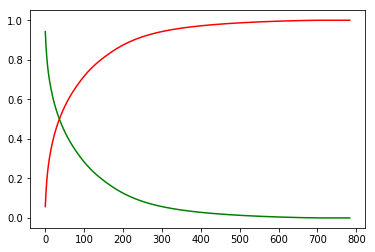

In [27]:
explained =  [explain_variances(i)[0] for i in range(784)]
loss = [explain_variances(i)[1] for i in range(784)]
plt.figure()
plt.plot(explained, 'r')
plt.plot(loss, 'g')
plt.show()

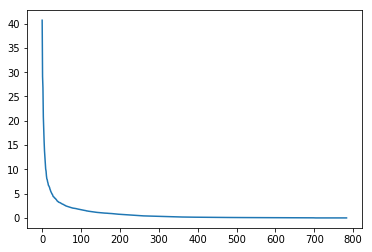

In [28]:
plt.figure()
plt.plot(eigen_values[:])
plt.show()

In [29]:
# Select top k dimensions

k = get_k(info=0.955)
dim = eigen_values.shape[0]
print(k, dim)

334 784


In [30]:
top_k_components = []

for i in range(k):
    top_k_components.append(eigen_vectors[:, i].reshape(dim, 1))
    
mat_W = np.hstack(top_k_components)

In [31]:
eigen_vectors[:,0].shape

(784,)

In [32]:
print(mat_W.shape)
print(X_std.shape)

(784, 334)
(42000, 784)


In [33]:
y = X_std.dot(mat_W)
print(y.shape)

(42000, 334)


In [34]:
y[0]

array([-2.00580365, -0.56966876,  1.01096695, -1.30110454, -1.94721576,
        0.63055185, -0.46391833,  1.74251914,  1.02924182,  1.77909105,
        0.89002998,  0.39937135, -0.16432201, -0.82948425,  0.96884497,
        1.45683508,  1.16366376,  0.14884136,  1.73696828, -0.49993803,
        0.39303097,  0.49721821, -0.08806621, -0.19694176, -0.12120827,
        0.75305949,  0.22440584,  0.06515471,  1.15266806, -0.65463434,
       -1.16723873,  1.11277884, -0.33426959,  0.39822934, -0.08189144,
        0.66759891,  0.4658299 ,  0.88986818, -0.21688878,  0.65976694,
       -1.24237104,  0.24343436,  0.27015382, -0.14642134,  0.02167602,
        1.38590574,  0.64709624,  0.12928811, -0.17491513,  0.40701422,
        0.32901565, -1.39754489,  0.48435784,  0.12999632, -0.07790274,
       -1.07064804, -0.67835498,  1.4770705 ,  0.81803476, -0.8409    ,
       -0.56576105,  1.35410695,  0.4243893 , -0.51501877,  1.16620152,
        0.31917513, -0.95503642,  0.91538514,  0.89313427,  0.24

# SKLearn

In [35]:
from sklearn.decomposition import PCA
import datetime

In [36]:
explain_variances(2)

--- At 2 ---
Variances Explained:  13.653016686530822 %
Loss:  86.34698331346917 %


(0.13653016686530822, 0.8634698331346917)

In [37]:
t0 = datetime.datetime.now()
pca = PCA(n_components=2)
X_sk = pca.fit_transform(X_std)
print("Time Taken: ", datetime.datetime.now() - t0)

Time Taken:  0:00:01.407271


In [38]:
X_sk.shape

(42000, 2)

In [39]:
var = pca.explained_variance_ratio_
print(var)
cumulative  = np.cumsum(var) / np.sum(var)
print(cumulative)

[0.05752403 0.04114837]
[0.58297995 1.        ]


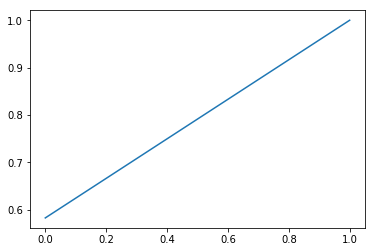

In [40]:
plt.figure()
plt.plot(cumulative)
plt.show()

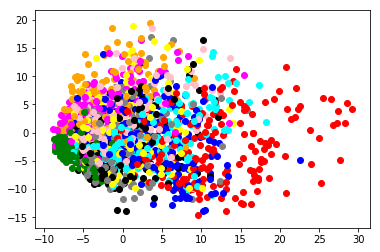

In [42]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'orange', 'gray', 'magenta']

plt.figure()
for i in range(2000):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[labels[i]])
plt.show()

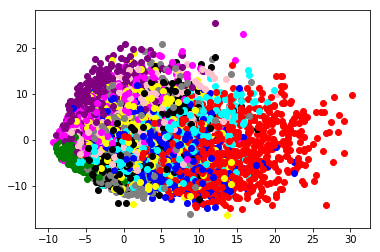

In [43]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(10000):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[labels[i]])
plt.show()